In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#Display more rows and columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_csv('SO_devtypes_part1.csv')

In [4]:
data.shape

(64461, 85)

### Get our dataset of interest - age

Remove all rows where the respondent did not fill in the columns we will be interested in this project; 1. Current age, 2. the age they wrote their first line of code, and 3. the years they have been actively coding, including in school.

In [5]:
data = data.dropna(subset=['Age', 'Age1stCode', 'YearsCode'])

In [6]:
data.shape

(45178, 85)

In [7]:
data.dtypes

Respondent                                         int64
MainBranch                                        object
Hobbyist                                          object
Age                                              float64
Age1stCode                                        object
CompFreq                                          object
CompTotal                                        float64
ConvertedComp                                    float64
Country                                           object
CurrencyDesc                                      object
CurrencySymbol                                    object
DatabaseDesireNextYear                            object
DatabaseWorkedWith                                object
DevType                                           object
EdLevel                                           object
Employment                                        object
Ethnicity                                         object
Gender                         

In [8]:
data.tail(4)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,total_types
64427,60149,NaN,Yes,34.0,18,NaN,NaN,NaN,Brazil,NaN,NaN,Firebase;PostgreSQL,DynamoDB;Elasticsearch;MySQL;PostgreSQL,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Hispanic or Latino/a/x,Man,NaN,NaN,NaN,Python;SQL,Python;SQL,Flutter;Keras;Teraform,Apache Spark;Pandas;Teraform,Confluence;Jira;Github;Slack;Google Suite (Doc...,Confluence;Jira;Github;Slack;Google Suite (Doc...,NaN,NaN,Very important,NaN,NaN,Once a year,No,NaN,NaN,NaN,Start a free trial;Visit developer communities...,Amused,Stack Overflow (public Q&A for anyone who codes),Call a coworker or friend;Visit Stack Overflow...,MacOS,NaN,AWS;Google Cloud Platform;Kubernetes,AWS,NaN,Straight / Heterosexual,Not sure/can't remember,"No, not really",NaN,A few times per month or weekly,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;Flask,Django,Just as welcome now as I felt last year,NaN,16,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
64430,61111,NaN,Yes,38.0,35,NaN,NaN,NaN,Israel,NaN,NaN,PostgreSQL,Firebase;Microsoft SQL Server,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Not employed, but looking for work",White or of European descent,Man,NaN,NaN,NaN,Haskell;HTML/CSS;JavaScript;Python;Rust,HTML/CSS;JavaScript;Python,Ansible;Node.js;Puppet,.NET Core;Node.js,NaN,NaN,NaN,NaN,Fairly important,NaN,NaN,Every few months,Not sure,NaN,NaN,NaN,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Meditate;Play games;Call a coworker or friend;...,Linux-based,NaN,Linux,Linux;Windows,NaN,Straight / Heterosexual,Yes,"No, not at all",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,No,NaN,React.js,ASP.NET Core;Django;React.js,Somewhat more welcome now than last year,NaN,3,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64433,61561,NaN,Yes,64.0,18,NaN,NaN,NaN,France,NaN,NaN,MySQL;Oracle,MySQL;Oracle,NaN,NaN,Retired,White or of European descent,Man,NaN,NaN,NaN,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Perl...,Ansible;Apache Spark;Hadoop;Node.js;Puppet,NaN,"Github;Gitlab;Google Suite (Docs, Meet, etc);S...",Github;Gitlab;Stack Overflow for Teams,NaN,NaN,Fairly important,NaN,NaN,Once a year,No,NaN,NaN,NaN,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,NaN,NaN,Android;Arduino;Docker;Linux;Windows;WordPress,Arduino;Docker;Linux;Raspberry Pi;Windows;Word...,NaN,Straight / Heterosexual,Yes,Neutral,Les

### Numeric features

In [9]:
data.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,total_types
count,45178.000000,45178.000000,3.052500e+04,3.046700e+04,35015.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000,45178.000000
mean,29021.501749,30.829607,3.276003e+44,1.033718e+05,40.776443,0.208331,0.482049,0.163885,0.089712,0.321572,0.482823,0.070300,0.108637,0.049316,0.101333,0.081456,0.063726,0.051530,0.093674,0.047656,0.044181,0.067644,0.058768,0.067444,0.036744,0.022290,0.034619,0.010248,2.757935
std,18661.359132,9.581431,5.723638e+46,2.242617e+05,17.359669,0.406120,0.499683,0.370175,0.285772,0.467085,0.499710,0.255654,0.311187,0.216529,0.301772,0.273537,0.244266,0.221078,0.291378,0.213040,0.205499,0.251136,0.235192,0.250793,0.188134,0.147625,0.182814,0.100715,2.414617
min,4.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13162.750000,24.000000,2.000000e+04,2.594400e+04,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,26299.000000,29.000000,6.300000e+04,5.404900e+04,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,47543.750000,35.000000,1.210000e+05,9.500000e+04,43.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,65629.000000,279.000000,1.000000e+49,2.000000e+06,475.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000


Findings
1. Age has outliers which maybe from data entry errors in that the maximum age is 279 and minimum is 1

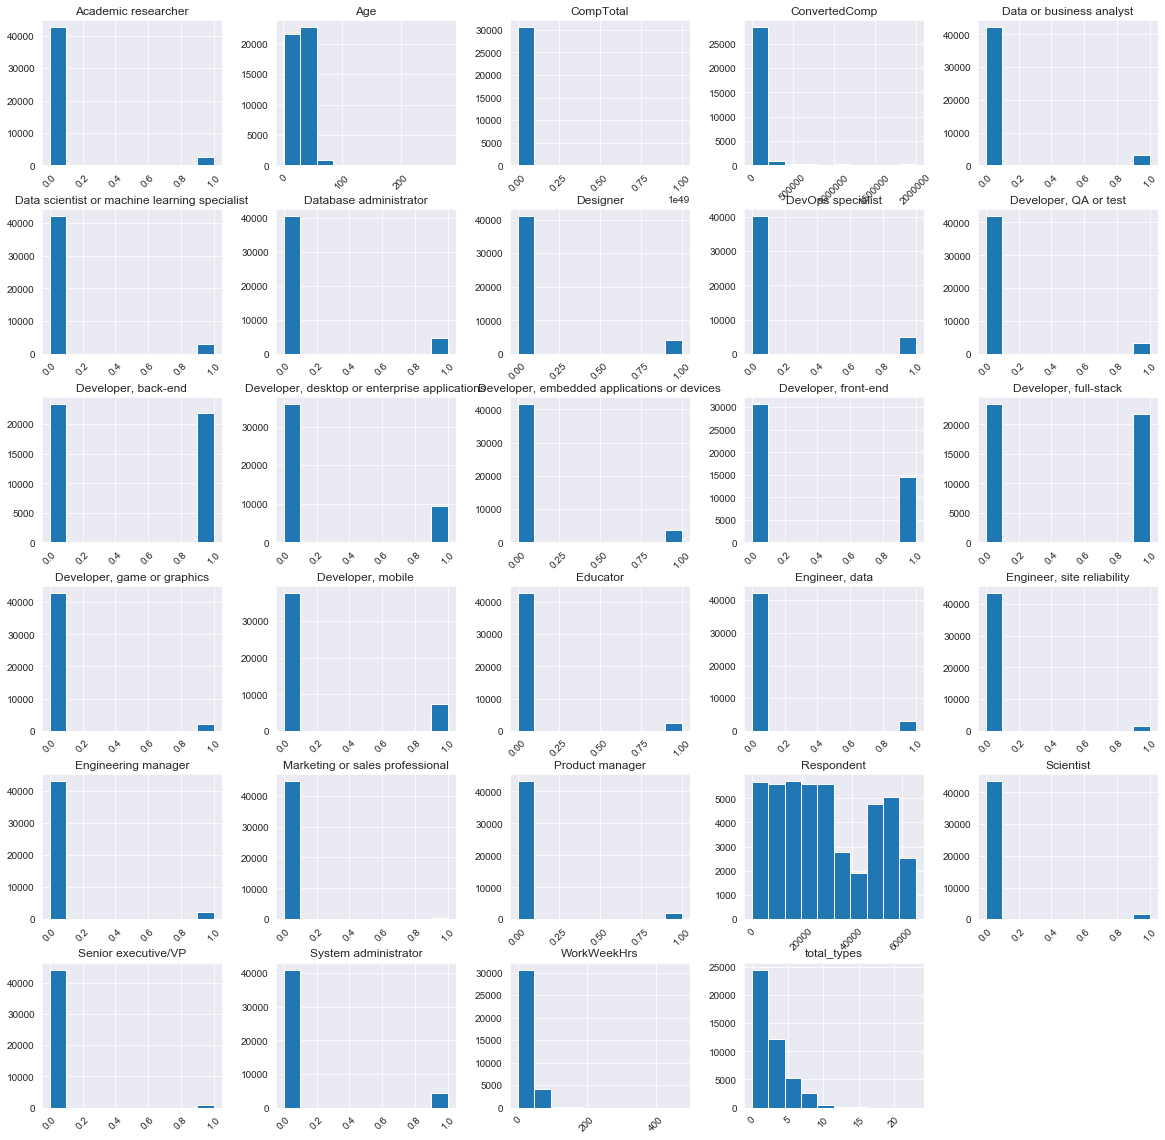

In [10]:
data.hist(figsize=(20,20), xrot=45);

Findings
1. Developer fullstack, developer backend and developer frontend are the most popular devtypes - the proportion of ones is largest with these
2. The others has relatively few ones.
3. For the totaltypes held by each respondent, seems most had only 2 specialization at almost 25k.

### Categorical features

In [11]:
data.describe(include='object')

,MainBranch,Hobbyist,Age1stCode,CompFreq,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,YearsCode,YearsCodePro
count,45097,45178,45178,33415,45178,36250,36250,34940,38861,38923,44207,45061,41093,44580,41641,36175,42764,42727,44782,34316,32424,38663,42614,35583,34864,38107,36087,35237,43554,42167,35539,44925,35894,29908,44649,45042,44664,44815,35605,40437,42565,32390,39751,44361,44353,37330,44393,44811,44683,43711,39465,32086,33664,42954,45178,36725
unique,5,2,59,3,171,125,124,2754,2503,6965,9,7,173,7,229,5,3,13862,12074,4519,2344,1179,1059,3,5,5,2099,63,4,3,3,2,5,63,4,58,429,4,9,6530,5538,3,14,3,6,6,6,3,3,2,12,3420,3295,6,52,52
top,I am a developer by profession,Yes,14,Yearly,United States,United States dollar,USD,PostgreSQL,MySQL,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Very satisfied,"I’m not actively looking, but I am open to new...",Python,HTML/CSS;JavaScript;PHP;SQL,Node.js,Node.js,Github,Github,No,Extremely important,Fairly important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Once a year,Not sure,Yes,No,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Windows,20 to 99 employees,Linux,Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Daily or almost daily,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,React.js,Just as welcome now as I felt last year,10,3
freq,34173,35512,4556,17368,9583,9012,9012,1948,2806,3399,20355,32533,26946,40708,2447,11885,24718,789,826,3324,5840,3641,3123,15770,16802,10024,990,2080,16289,16835,17139,26489,9693,6082,23415,17795,2272,21181,7812,1586,3645,14121,36271,37394,12328,16689,13744,30919,34591,43333,24491,1992,1569,31209,3575,3757


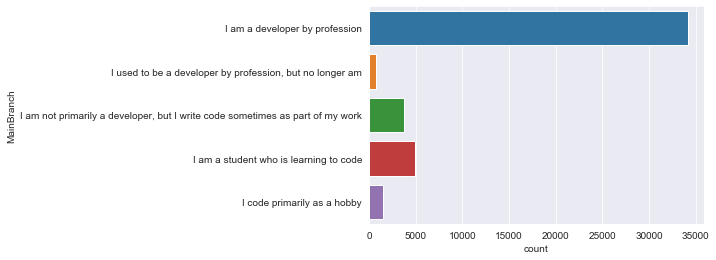

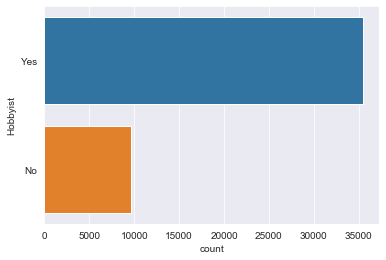

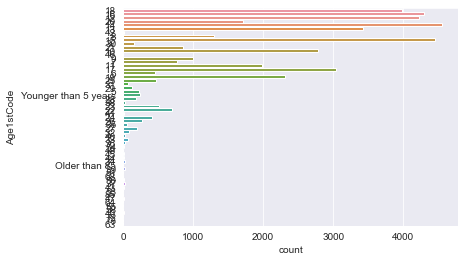

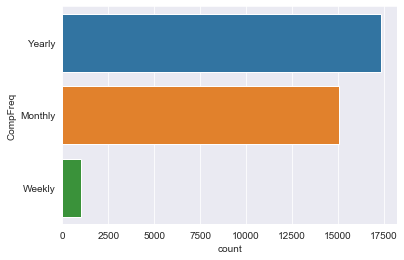

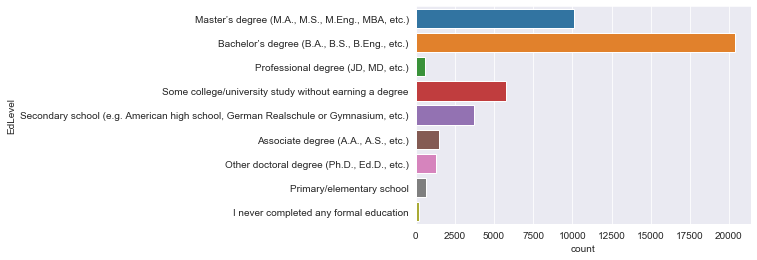

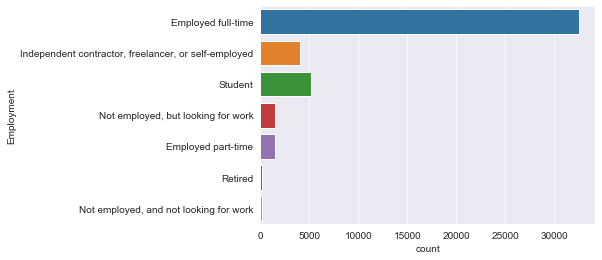

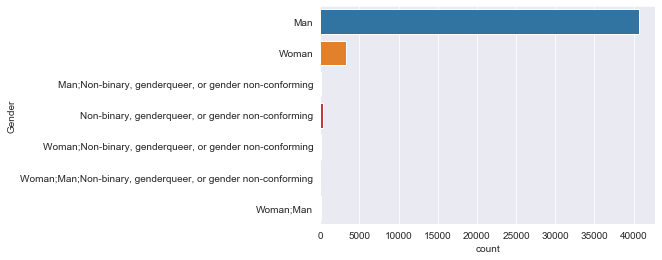

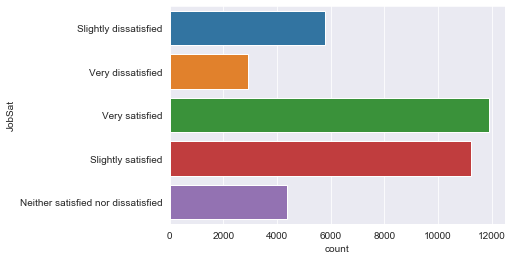

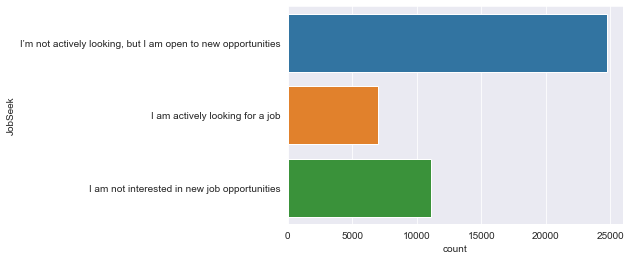

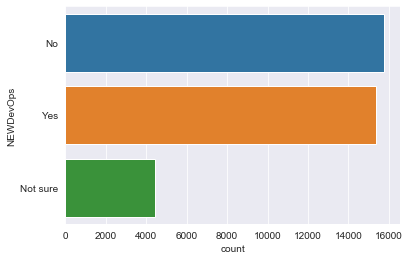

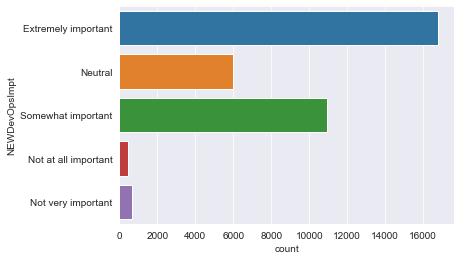

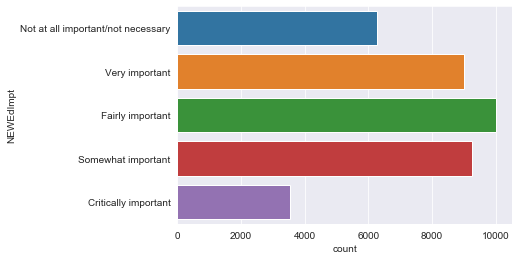

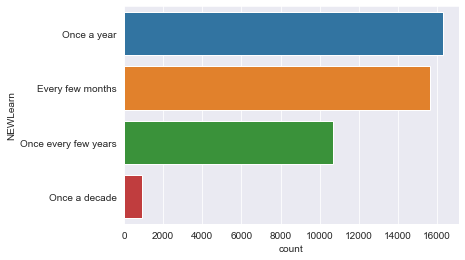

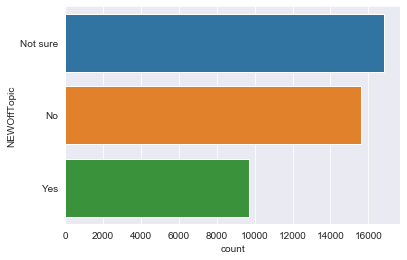

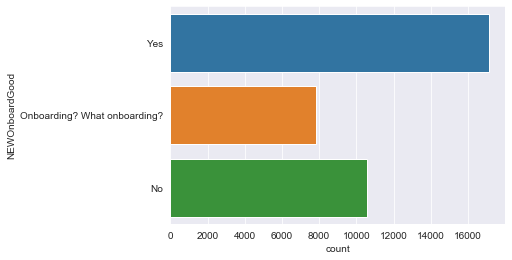

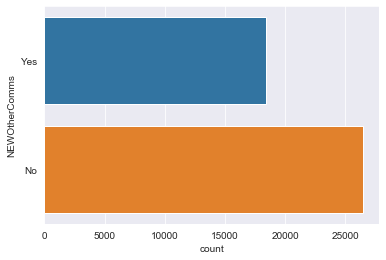

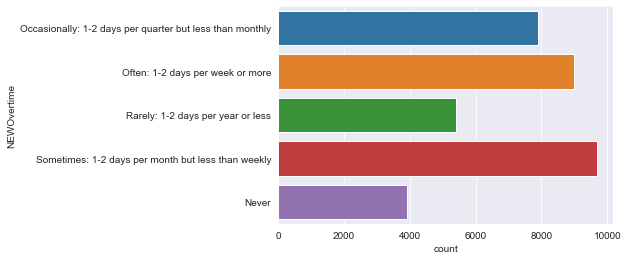

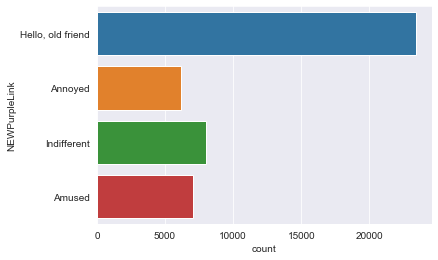

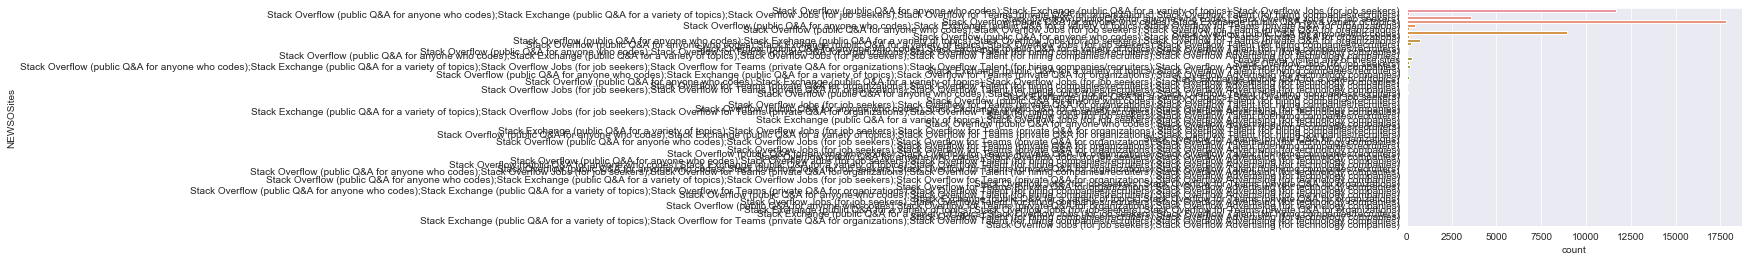

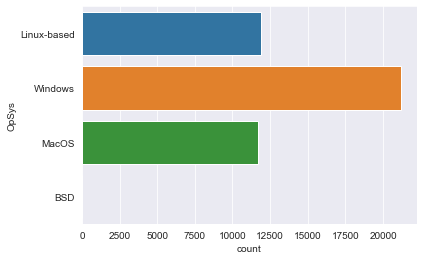

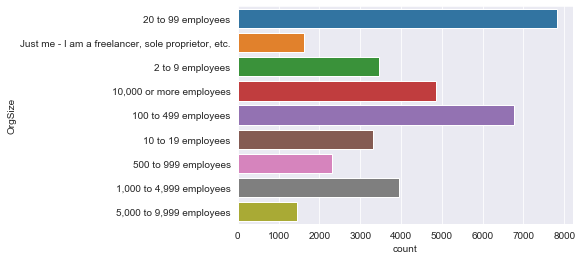

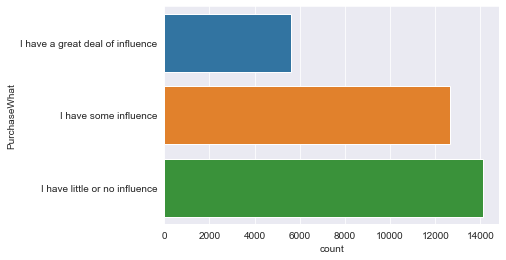

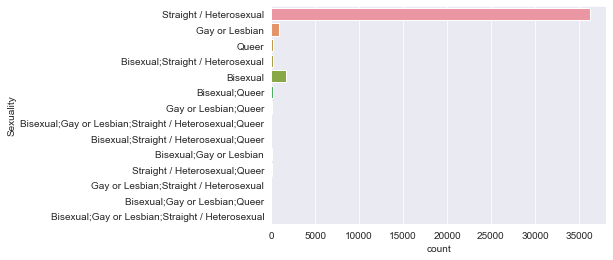

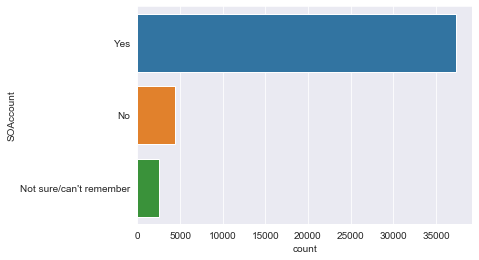

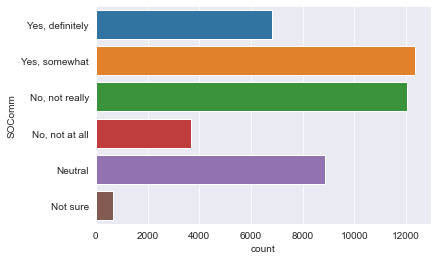

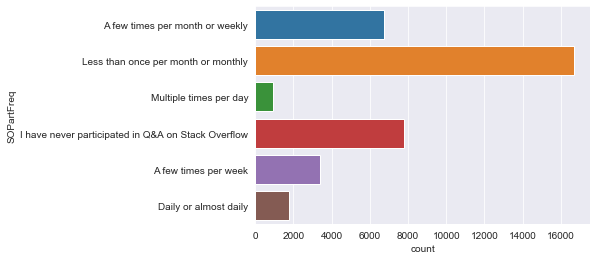

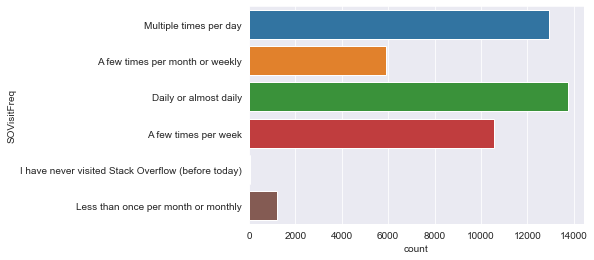

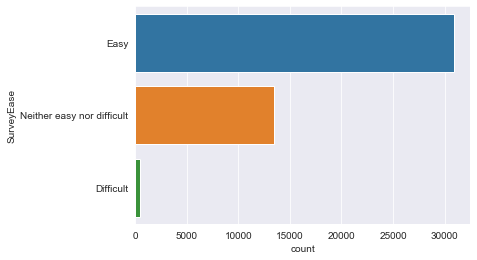

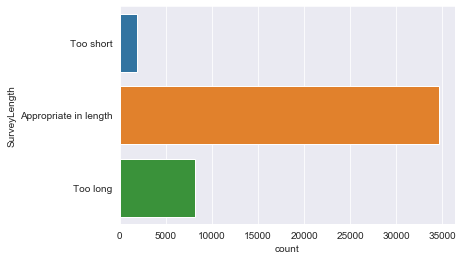

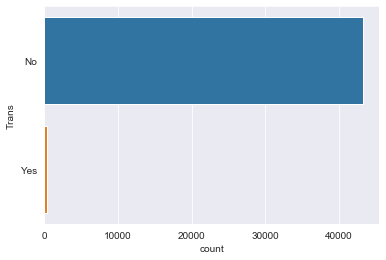

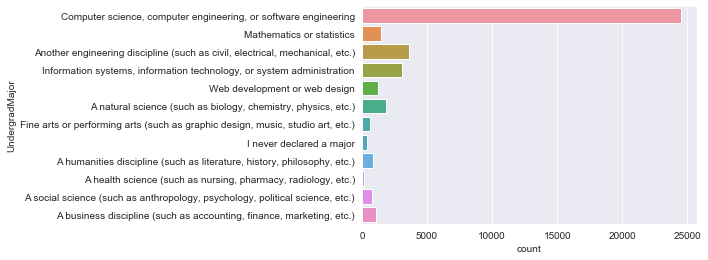

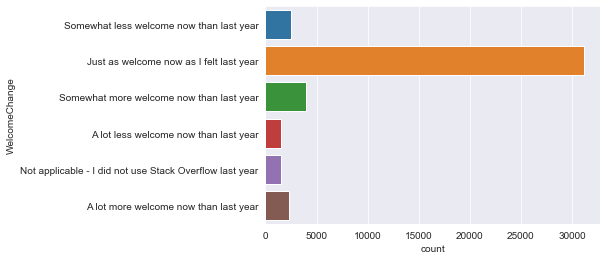

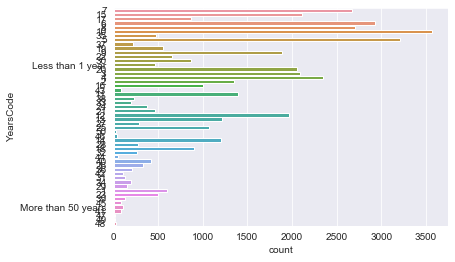

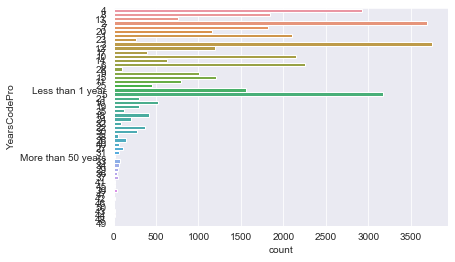

In [12]:
for col in data.select_dtypes(include='object'):
    if data[col].nunique() < 60:
        sns.countplot(y = col, data=data)
        plt.show()

### Change YearsCode and YearsCodePro to numeric features

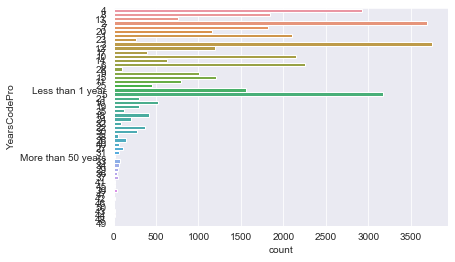

In [13]:
sns.countplot(y='YearsCodePro', data=data)
plt.show()

In [11]:
# years_coded_order = ['Less than 1 year' ,'0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
#        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
#        '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
#        '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
#        '46', '47', '48', '49', '50','More than 50 years']
# data["YearsCodePro"] = pd.Categorical(data["YearsCodePro"], categories = years_coded_order, ordered=True)
# data['YearsCodePro'].value_counts().sort_index()

##### First choose the columns we want and the order we want them in

In [14]:
data2 = data.reindex(columns = ['Respondent','MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'YearsCode','YearsCodePro','total_types',
                                'Country', 'DevType',
                                'Employment', 'Ethnicity', 'Gender', 'EdLevel', 'UndergradMajor','NEWPurpleLink',
                                 'Developer, desktop or enterprise applications',
                                   'Developer, full-stack', 'Developer, mobile', 'Designer',
                                   'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
                                   'DevOps specialist', 'Developer, game or graphics',
                                   'Database administrator', 'Developer, embedded applications or devices',
                                   'Engineer, data', 'Educator', 'System administrator',
                                   'Engineering manager', 'Product manager', 'Data or business analyst',
                                   'Academic researcher', 'Data scientist or machine learning specialist',
                                   'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
                                   'Marketing or sales professional'
                                ])

In [15]:
data2.sample(4)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,YearsCode,YearsCodePro,total_types,Country,DevType,Employment,Ethnicity,Gender,EdLevel,UndergradMajor,NEWPurpleLink,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
33695,33818,I am a developer by profession,Yes,43.0,9,34,21,4,Brazil,"Developer, full-stack;Developer, mobile;Engine...","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Annoyed,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
48857,49868,"I am not primarily a developer, but I write co...",Yes,49.0,8,More than 50 years,5,0,United States,NaN,Employed full-time,Biracial;Multiracial,"Non-binary, genderqueer, or gender non-conforming","Associate degree (A.A., A.S., etc.)","Information systems, information technology, o...","Hello, old friend",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61458,62703,I am a student who is learning to code,Yes,21.0,16,6,NaN,3,India,"Developer, back-end;Developer, full-stack;Deve...",Employed full-time,South Asian,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Amused,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55225,56339,I am a developer by profession,Yes,24.0,20,1,NaN,3,Iraq,Data scientist or machine learning specialist;...,"Not employed, but looking for work",NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...","Hello, old friend",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [18]:
data2['YearsCode'] = data2['YearsCode'].replace('Less than 1 year', 0.5)
data2['YearsCode'] = data2['YearsCode'].replace('More than 50 years', 50.5)
data2['YearsCode'] = data2['YearsCode'].astype(float)

In [19]:
data2['YearsCodePro'] = data2['YearsCodePro'].replace('Less than 1 year', 0.5)
data2['YearsCodePro'] = data2['YearsCodePro'].replace('More than 50 years', 50.5)
data2['YearsCodePro'] = data2['YearsCodePro'].astype(float)

#### Create a new column that shows years to become a pro

In [20]:
data2['years_to_pro'] = data2['YearsCode'] - data2['YearsCodePro']

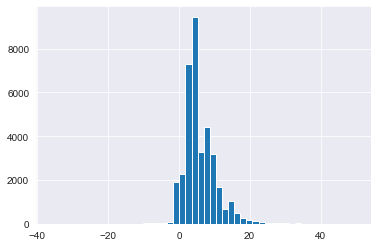

In [21]:
data2['years_to_pro'].hist(bins = 50)

##### Reindex the columns again for the column we have engineered

In [24]:
data3 = data2.reindex(columns = ['Respondent','MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'YearsCode','YearsCodePro','years_to_pro',
                                'total_types','Country', 'DevType',
                                'Employment', 'Ethnicity', 'Gender', 'EdLevel', 'UndergradMajor','NEWPurpleLink',
                                 'Developer, desktop or enterprise applications',
                                   'Developer, full-stack', 'Developer, mobile', 'Designer',
                                   'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
                                   'DevOps specialist', 'Developer, game or graphics',
                                   'Database administrator', 'Developer, embedded applications or devices',
                                   'Engineer, data', 'Educator', 'System administrator',
                                   'Engineering manager', 'Product manager', 'Data or business analyst',
                                   'Academic researcher', 'Data scientist or machine learning specialist',
                                   'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
                                   'Marketing or sales professional'
                                ])

##### Why are some 'years_to_pro' negative?

These do not seem like errors, perhaps the respondents interchanged the answers?

In [25]:
data3[data3['years_to_pro'] < 0].sample(4)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,YearsCode,YearsCodePro,years_to_pro,total_types,Country,DevType,Employment,Ethnicity,Gender,EdLevel,UndergradMajor,NEWPurpleLink,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
10747,10781,"I am not primarily a developer, but I write co...",No,26.0,16,0.5,1.0,-0.5,2,Taiwan,Academic researcher;Data or business analyst,Employed full-time,East Asian,Man,"Professional degree (JD, MD, etc.)","A natural science (such as biology, chemistry,...","Hello, old friend",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
50633,51675,I am a developer by profession,Yes,36.0,6,10.0,23.0,-13.0,15,United States,Academic researcher;Database administrator;Dev...,Employed full-time,NaN,Man,NaN,NaN,"Hello, old friend",1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,0,1,1,0
23088,23177,I am a developer by profession,Yes,39.0,18,17.0,19.0,-2.0,1,Brazil,"Developer, back-end","Independent contractor, freelancer, or self-em...",Hispanic or Latino/a/x,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Indifferent,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29100,29209,I am a developer by profession,Yes,23.0,13,0.5,5.0,-4.5,3,Turkey,"Developer, full-stack;DevOps specialist;System...",Employed full-time,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Correlations between the numeric features

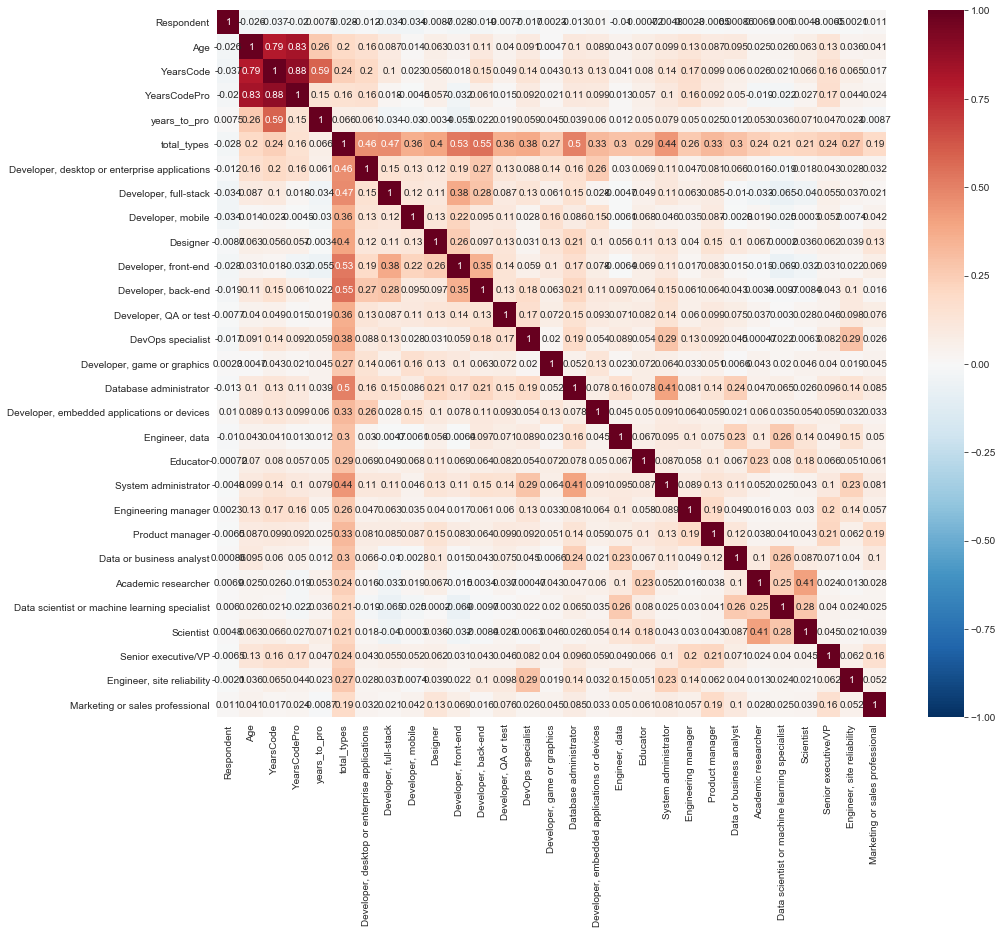

In [26]:
corr = data3.corr()
plt.figure(figsize = (15, 13))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

In [27]:
data3.describe(include='object')

,MainBranch,Hobbyist,Age1stCode,Country,DevType,Employment,Ethnicity,Gender,EdLevel,UndergradMajor,NEWPurpleLink
count,45097,45178,45178,45178,38923,45061,41093,44580,44207,39465,44649
unique,5,2,59,171,6965,7,173,7,9,12,4
top,I am a developer by profession,Yes,14,United States,"Developer, full-stack",Employed full-time,White or of European descent,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...","Hello, old friend"
freq,34173,35512,4556,9583,3399,32533,26946,40708,20355,24491,23415


### Distribution of Age in the categorical features

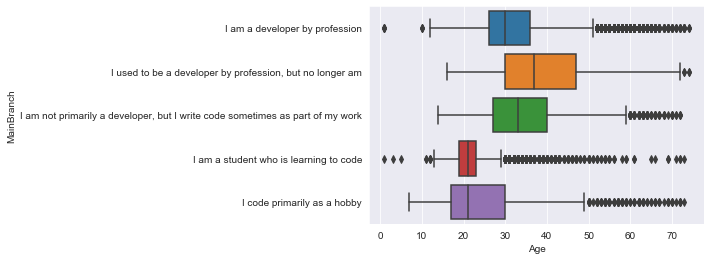

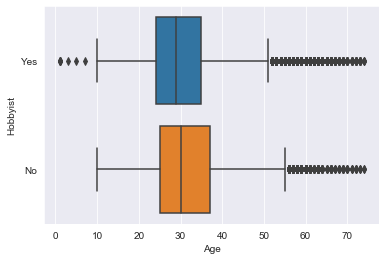

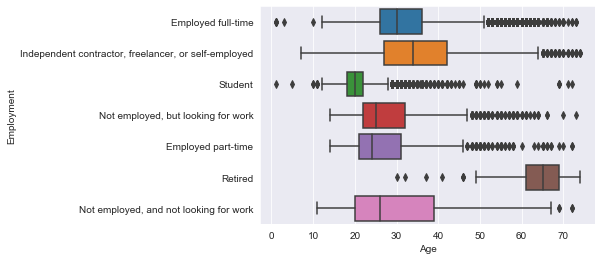

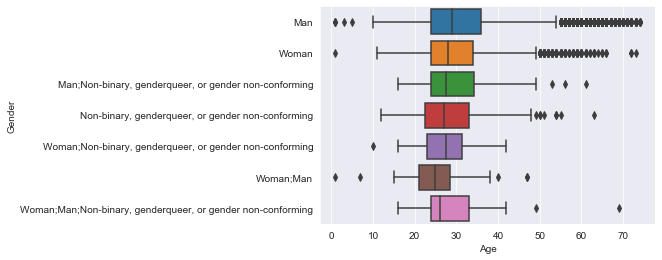

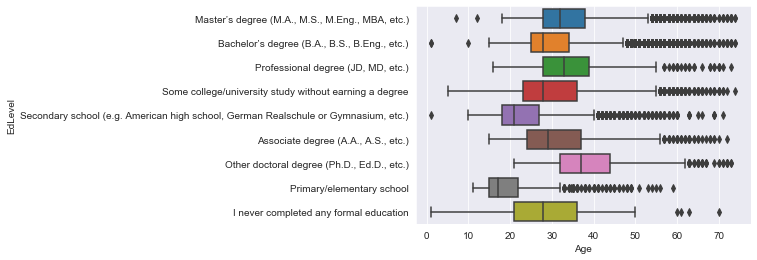

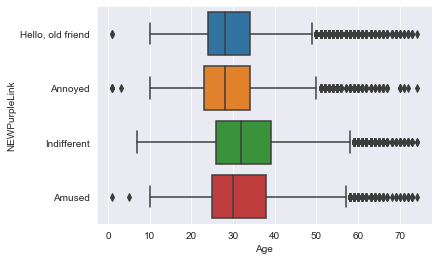

In [28]:
for column in data3.select_dtypes(include='object'):
    if data3[column].nunique() < 12:
        sns.boxplot(y=column, x='Age', data=data3[data3['Age'] < 75])
        plt.show()

### Distribution of YearsCodePro

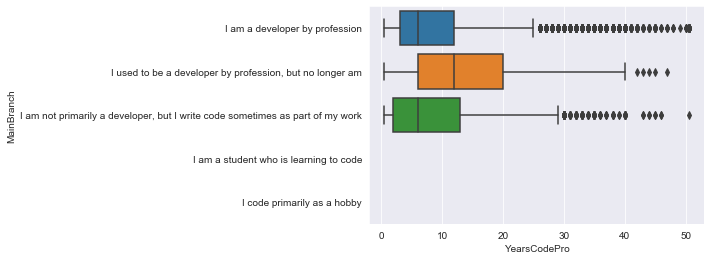

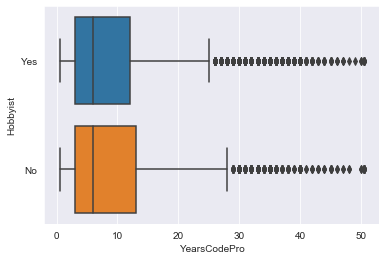

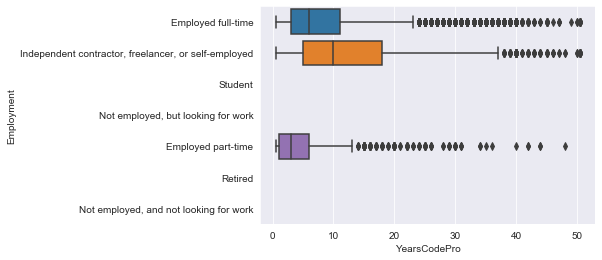

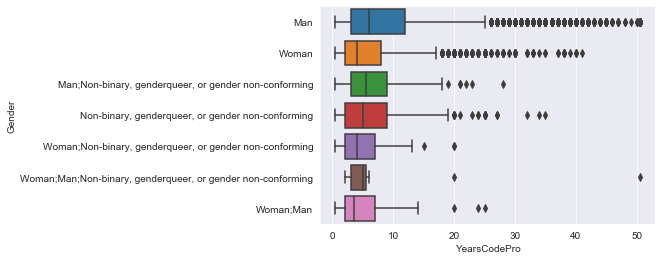

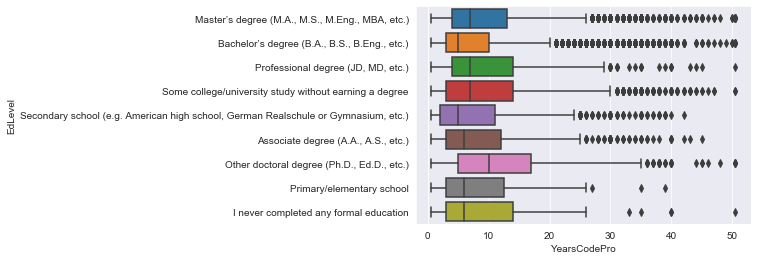

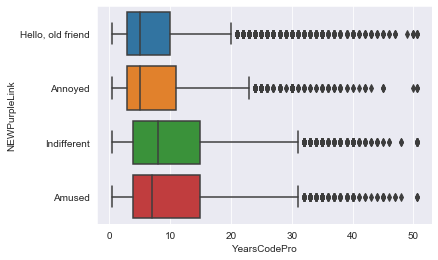

In [29]:
for column in data3.select_dtypes(include='object'):
    if data3[column].nunique() < 12:
        sns.boxplot(y=column, x='YearsCodePro', data=data3)
        plt.show()

### Distribution of years_to_pro

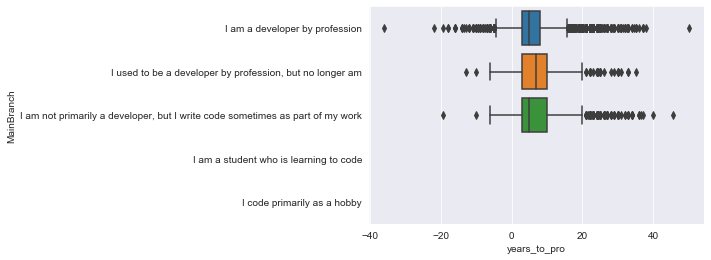

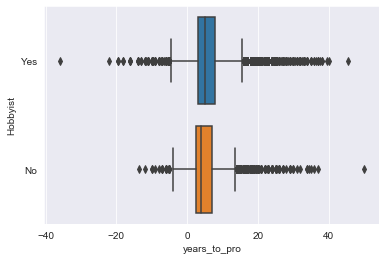

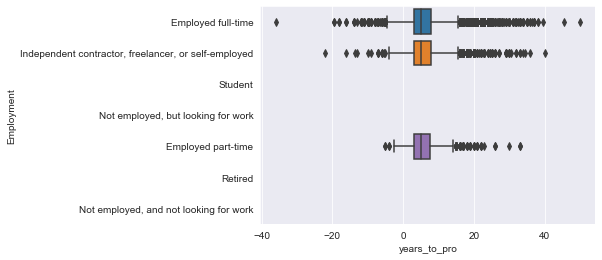

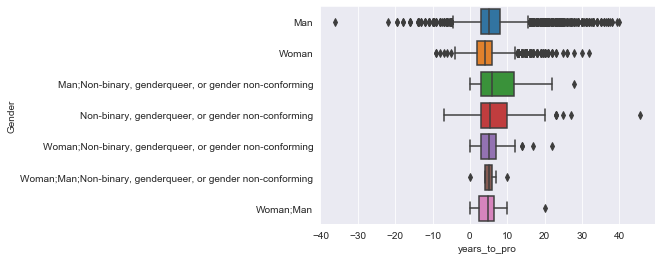

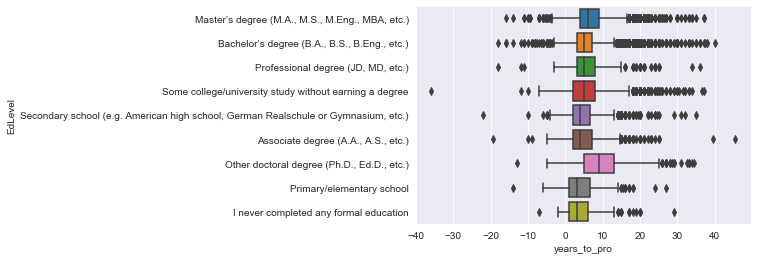

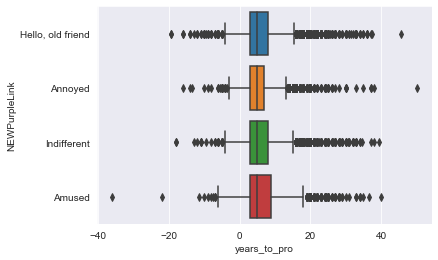

In [30]:
for column in data3.select_dtypes(include='object'):
    if data3[column].nunique() < 12:
        sns.boxplot(y=column, x='years_to_pro', data=data3)
        plt.show()

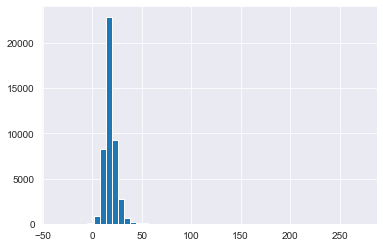

In [31]:
#Age when guys started serious coding
(data3['Age'] - data3['YearsCode']).hist(bins = 50)

### Clean up the Age. Remove rows where the person is aged over 75 or less than 10 years.

In [32]:
data4 = data3[(data3['Age'] < 75) & (data3['Age'] > 10)]

### Add a new column: the age when a person started actively(serious) coding

In [33]:
#Age when guys started actively coding, probably in school
data4['age_serious_code'] = (data4['Age'] - data4['YearsCode'])

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
data4.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,YearsCode,YearsCodePro,years_to_pro,total_types,Country,DevType,Employment,Ethnicity,Gender,EdLevel,UndergradMajor,NEWPurpleLink,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional,age_serious_code
3,4,I am a developer by profession,Yes,25.0,18,7.0,4.0,3.0,0,Albania,NaN,NaN,White or of European descent,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,15.0,8.0,7.0,0,United States,NaN,Employed full-time,White or of European descent,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...","Hello, old friend",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.0
7,8,I am a developer by profession,Yes,36.0,12,17.0,13.0,4.0,3,United States,"Developer, back-end;Developer, desktop or ente...",Employed full-time,White or of European descent,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...","Hello, old friend",1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0
8,9,I am a developer by profession,No,30.0,20,6.0,4.0,2.0,1,Tunisia,"Developer, full-stack","Independent contractor, freelancer, or self-em...",NaN,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...","Hello, old friend",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24.0
9,10,I am a developer by profession,Yes,22.0,14,8.0,4.0,4.0,3,United Kingdom,"Database administrator;Developer, full-stack;D...",Employed full-time,White or of European descent,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,"Hello, old friend",0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0


##### Reindex the columns again for the new column added

In [36]:
data4 =data4.reindex(columns = ['Respondent','MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'YearsCode','YearsCodePro','years_to_pro',
                                'age_serious_code', 'total_types','Country', 'Gender', 'DevType',
                                'Employment', 'Ethnicity',  'EdLevel', 'UndergradMajor','NEWPurpleLink',
                                 'Developer, desktop or enterprise applications',
                                   'Developer, full-stack', 'Developer, mobile', 'Designer',
                                   'Developer, front-end', 'Developer, back-end', 'Developer, QA or test',
                                   'DevOps specialist', 'Developer, game or graphics',
                                   'Database administrator', 'Developer, embedded applications or devices',
                                   'Engineer, data', 'Educator', 'System administrator',
                                   'Engineering manager', 'Product manager', 'Data or business analyst',
                                   'Academic researcher', 'Data scientist or machine learning specialist',
                                   'Scientist', 'Senior executive/VP', 'Engineer, site reliability',
                                   'Marketing or sales professional'
                                ])

In [37]:
data4.sample(4)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,YearsCode,YearsCodePro,years_to_pro,age_serious_code,total_types,Country,Gender,DevType,Employment,Ethnicity,EdLevel,UndergradMajor,NEWPurpleLink,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
47534,48528,I am a developer by profession,No,45.0,9,36.0,18.0,18.0,9.0,1,United States,Man,"Developer, desktop or enterprise applications",Employed full-time,White or of European descent,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...","Hello, old friend",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51316,52381,I am a developer by profession,Yes,42.0,14,28.0,NaN,NaN,14.0,6,United States,Man,"Developer, back-end;Developer, front-end;Devel...","Not employed, but looking for work",White or of European descent,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Indifferent,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
29794,29906,I am a developer by profession,Yes,23.0,9,8.0,0.5,7.5,15.0,3,Brazil,Man,"Developer, back-end;Developer, front-end;Devel...",Employed full-time,Hispanic or Latino/a/x;White or of European de...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...","Hello, old friend",0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57178,58305,I am a developer by profession,No,44.0,17,22.0,18.0,4.0,22.0,4,Brazil,Man,"Developer, back-end;Developer, desktop or ente...",Employed full-time,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...","Hello, old friend",1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
data4.describe()

,Respondent,Age,YearsCode,YearsCodePro,years_to_pro,age_serious_code,total_types,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
count,45110.000000,45110.000000,45110.000000,36691.000000,36691.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000,45110.000000
mean,29022.384039,30.768677,13.045433,8.601728,5.831048,17.723243,2.759144,0.208557,0.482376,0.163955,0.089625,0.321769,0.483263,0.070317,0.108690,0.049346,0.101264,0.081534,0.063755,0.051541,0.093682,0.047683,0.044203,0.067635,0.058723,0.067435,0.036688,0.022212,0.034649,0.010242
std,18660.084128,9.319008,9.640055,7.761151,4.517477,5.920558,2.411970,0.406281,0.499695,0.370239,0.285647,0.467160,0.499725,0.255683,0.311253,0.216592,0.301681,0.273657,0.244319,0.221100,0.291389,0.213098,0.205548,0.251121,0.235108,0.250777,0.187997,0.147375,0.182890,0.100682
min,4.000000,11.000000,0.500000,0.500000,-36.000000,-35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13165.250000,24.000000,6.000000,3.000000,3.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26304.500000,29.000000,10.000000,6.000000,5.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47539.750000,35.000000,18.000000,12.000000,8.000000,20.000000,4.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65629.000000,74.000000,50.500000,50.500000,50.000000,71.500000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### remove the rows where the age when the respondents started active coding is less than 5 years

In [39]:
data5 = data4[data4['age_serious_code'] > 5]

In [40]:
data5.shape

(44823, 41)

In [45]:
data5['age_serious_code'].value_counts().sort_index().head(5)

5.8      1
6.0    238
6.5      1
7.0    362
7.5      1
Name: age_serious_code, dtype: int64

#### Number of respondents who fall under different age groups, for the year they began active coding

In [52]:
len(data5[data5['age_serious_code'] < 20])

31771

In [53]:
len(data5[(data5['age_serious_code'] >=20) & (data5['age_serious_code'] < 30)])

11283

In [54]:
len(data5[(data5['age_serious_code'] >=30) & (data5['age_serious_code'] < 40)])

1445

In [55]:
len(data5[(data5['age_serious_code'] >=40) & (data5['age_serious_code'] < 50)])

251

In [56]:
len(data5[(data5['age_serious_code'] >=50)])

73

In [57]:
data5.describe(include='object')

,MainBranch,Hobbyist,Age1stCode,Country,Gender,DevType,Employment,Ethnicity,EdLevel,UndergradMajor,NEWPurpleLink
count,44748,44823,44823,44823,44246,38661,44709,40793,43875,39188,44295
unique,5,2,58,171,7,6897,7,170,9,12,4
top,I am a developer by profession,Yes,14,United States,Man,"Developer, full-stack",Employed full-time,White or of European descent,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...","Hello, old friend"
freq,33947,35208,4549,9453,40420,3382,32318,26721,20244,24333,23254


### Distribution of age_serious_code among the categorical features

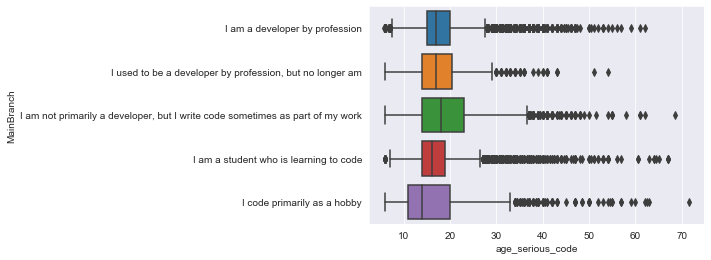

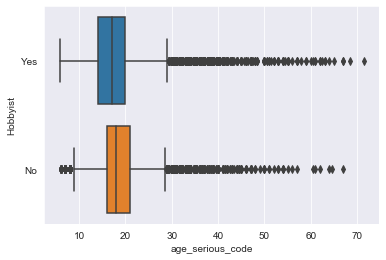

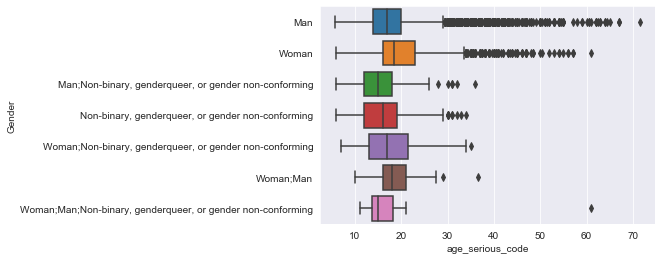

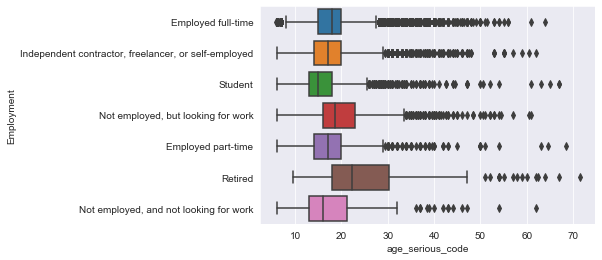

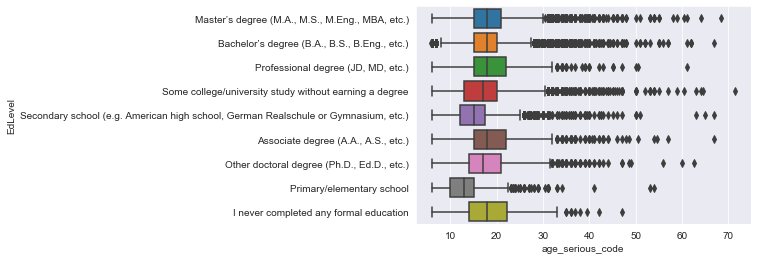

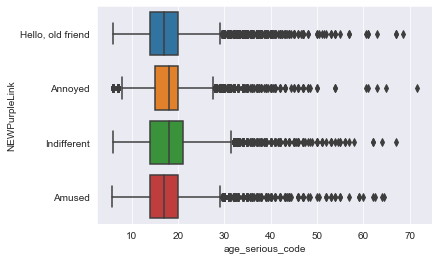

In [58]:
for column in data5.select_dtypes(include='object'):
    if data5[column].nunique() < 12:
        sns.boxplot(y=column, x='age_serious_code', data=data5)
        plt.show()

### Create a new column for the age groups when people started coding

In [59]:
data5['began_dev_agegroup'] = ''

C:\Users\Susan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
data5.loc[(data5['age_serious_code'] < 20), 'began_dev_agegroup'] = 'below 20 years'
data5.loc[(data5['age_serious_code'] >=20) & (data5['age_serious_code'] < 30), 'began_dev_agegroup'] = 'In my Twenties'
data5.loc[(data5['age_serious_code'] >=30) & (data5['age_serious_code'] < 40), 'began_dev_agegroup'] = 'In my Thirties'
data5.loc[(data5['age_serious_code'] >=40) & (data5['age_serious_code'] < 50), 'began_dev_agegroup'] = 'In my Fourties'
data5.loc[(data5['age_serious_code'] >=50), 'began_dev_agegroup'] = 'In my Fifties'

C:\Users\Susan\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [61]:
data5['began_dev_agegroup'].value_counts()

below 20 years    31771
In my Twenties    11283
In my Thirties     1445
In my Fourties      251
In my Fifties        73
Name: began_dev_agegroup, dtype: int64

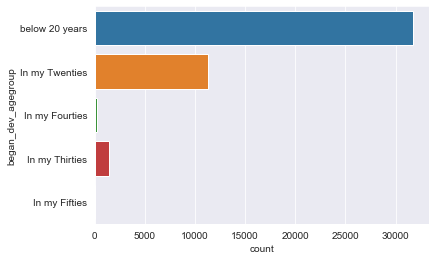

In [62]:
sns.countplot(y='began_dev_agegroup', data=data5);

In [63]:
data5.groupby('began_dev_agegroup').mean()

,Respondent,Age,YearsCode,YearsCodePro,years_to_pro,age_serious_code,total_types,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
began_dev_agegroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
In my Fifties,29855.000000,60.849315,4.561644,6.421053,-1.684211,56.287671,1.397260,0.041096,0.178082,0.054795,0.136986,0.178082,0.136986,0.013699,0.000000,0.041096,0.013699,0.013699,0.041096,0.095890,0.027397,0.027397,0.068493,0.054795,0.054795,0.054795,0.068493,0.068493,0.000000,0.027397
In my Fourties,33112.968127,49.645418,6.739044,5.379747,1.901899,42.906375,2.031873,0.091633,0.310757,0.139442,0.131474,0.294821,0.223108,0.059761,0.023904,0.031873,0.095618,0.059761,0.039841,0.039841,0.067729,0.027888,0.035857,0.151394,0.059761,0.047809,0.031873,0.015936,0.007968,0.043825
In my Thirties,30171.857439,40.943253,7.920761,6.386758,2.211872,33.022491,2.411765,0.150865,0.413841,0.121799,0.120415,0.336332,0.334948,0.063668,0.053979,0.033910,0.088581,0.042215,0.060208,0.056055,0.092734,0.026298,0.046367,0.123183,0.065052,0.067820,0.038062,0.015917,0.021453,0.038062
In my Twenties,29123.956306,32.549765,9.737437,7.231319,3.068753,22.812328,2.655765,0.182487,0.483648,0.157759,0.091022,0.343703,0.463972,0.068599,0.092883,0.032615,0.096074,0.064965,0.067978,0.047594,0.076309,0.036161,0.040858,0.084818,0.058406,0.076664,0.037047,0.015333,0.025791,0.011079
below 20 years,28876.838343,29.444053,14.380079,9.200314,6.963900,15.063973,2.812754,0.221208,0.487268,0.168518,0.087061,0.314186,0.499544,0.071323,0.116931,0.055680,0.102987,0.088981,0.062604,0.052406,0.099493,0.052343,0.044852,0.058103,0.058355,0.064052,0.036134,0.024488,0.038085,0.008152


### Correlations matrix heatmap for the numeric features

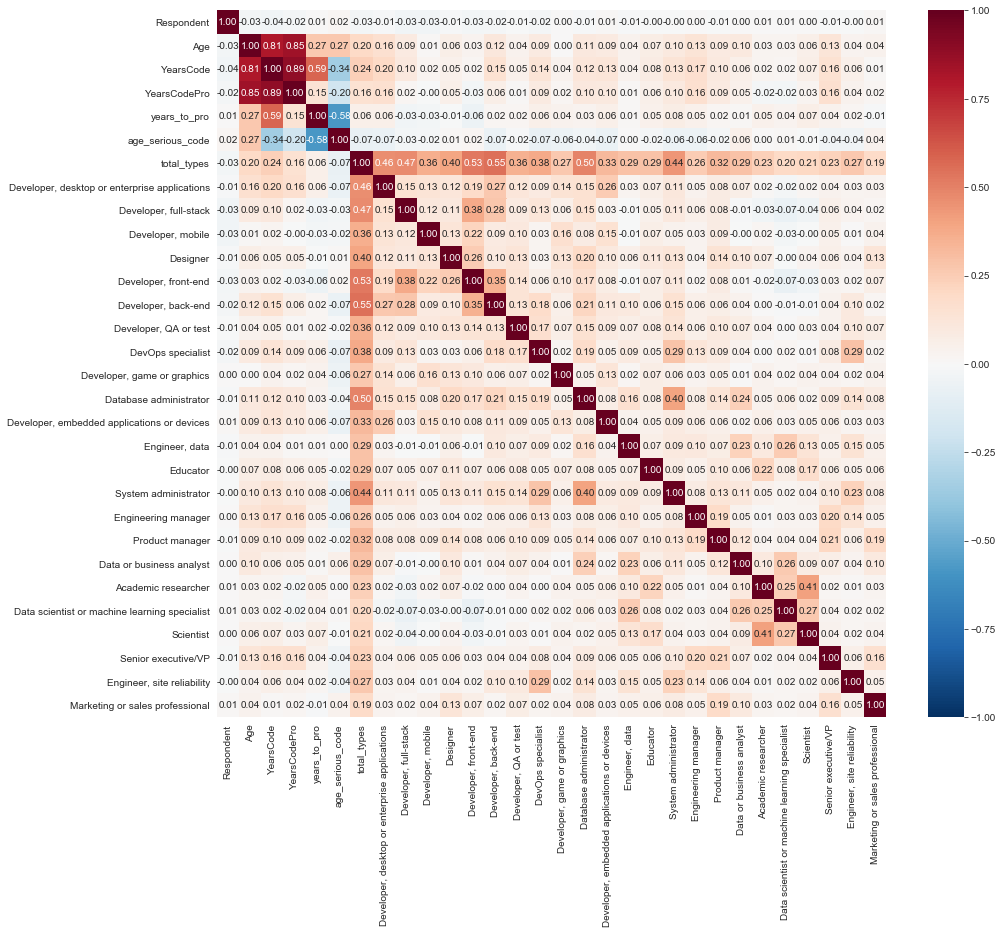

In [64]:
plt.figure(figsize=(15,13))
sns.heatmap(data5.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1, fmt='.2f')
plt.show()

In [66]:
data5.corr().head()

,Respondent,Age,YearsCode,YearsCodePro,years_to_pro,age_serious_code,total_types,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,"Developer, embedded applications or devices","Engineer, data",Educator,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
Respondent,1.000000,-0.025374,-0.037327,-0.019682,0.007017,0.020701,-0.028049,-0.011901,-0.033523,-0.034302,-0.008240,-0.027832,-0.018615,-0.007276,-0.017155,0.003103,-0.013536,0.010228,-0.009920,-0.001041,-0.004617,0.001993,-0.006289,0.001248,0.006585,0.006394,0.004445,-0.005820,-0.001511,0.011121
Age,-0.025374,1.000000,0.810600,0.845957,0.272204,0.270063,0.203123,0.163231,0.091516,0.013891,0.062790,0.034358,0.115185,0.042177,0.093378,0.003713,0.105812,0.091715,0.043733,0.071496,0.100328,0.134576,0.089329,0.098212,0.025690,0.026695,0.062052,0.131750,0.035611,0.041553
YearsCode,-0.037327,0.810600,1.000000,0.887885,0.585286,-0.344927,0.240822,0.200641,0.104780,0.024729,0.054672,0.020513,0.154475,0.050399,0.135277,0.041109,0.124731,0.129860,0.041549,0.079517,0.134454,0.166749,0.098903,0.059963,0.024377,0.020211,0.065070,0.155018,0.062083,0.014564
YearsCodePro,-0.019682,0.845957,0.887885,1.000000,0.146633,-0.199134,0.155503,0.162311,0.019090,-0.004103,0.054921,-0.031161,0.062885,0.014691,0.091559,0.019959,0.104837,0.098605,0.012155,0.057007,0.100467,0.159011,0.090860,0.049205,-0.019455,-0.023862,0.025534,0.162824,0.042261,0.023111
years_to_pro,0.007017,0.272204,0.585286,0.146633,1.000000,-0.580745,0.061495,0.061688,-0.033569,-0.030451,-0.005914,-0.056333,0.021647,0.019769,0.055117,0.041083,0.034346,0.058989,0.011301,0.048812,0.075626,0.048552,0.022655,0.009065,0.051507,0.035412,0.069351,0.044219,0.017909,-0.012441


### We want only the correlation cofficients for 'age_serious_code' column

Create a dataframe from that series object

In [68]:
age_serious = data5.corr()['age_serious_code'].sort_values()
corrs = pd.DataFrame(age_serious)
corrs = corrs.reset_index()
corrs.columns = ['Feature', 'Correlation']
corrs.head()

,Feature,Correlation
0,years_to_pro,-0.580745
1,YearsCode,-0.344927
2,YearsCodePro,-0.199134
3,DevOps specialist,-0.072752
4,total_types,-0.070383


Remove 'Age' and 'age_serious_code' which are naturally highly correlated with age_serious_code

In [69]:
corrs = corrs[(corrs['Feature'] != 'Age') & (corrs['Feature'] != 'age_serious_code')]

### Diverging barplots of the correlation coefficients of 'age_serious_code' with other numeric features

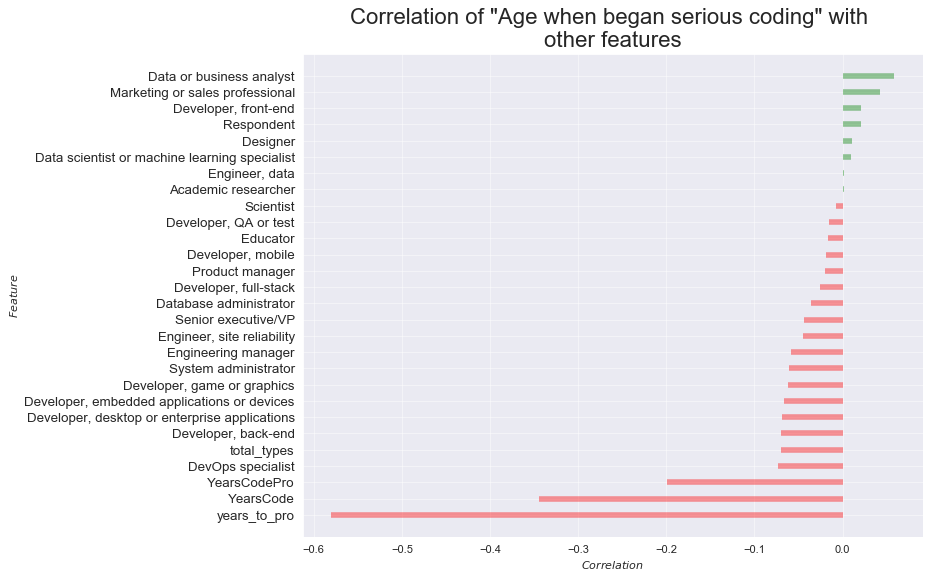

In [70]:
# Prepare Data
x = corrs.loc[:, ['Feature']]
corrs['colors'] = ['red' if x < 0 else 'green' for x in corrs['Correlation']]

# Draw plot
plt.figure(figsize=(10,8), dpi= 80)
plt.hlines(y=corrs['Feature'], xmin=0, xmax=corrs['Correlation'], color=corrs.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Feature$', xlabel='$Correlation$')
plt.yticks(corrs.index, corrs['Feature'], fontsize=12)
plt.title('Correlation of "Age when began serious coding" with \nother features', fontdict={'size':20})
plt.grid(linestyle='-', alpha=0.5)
plt.show()

Findings: 
1. The higher the age when a person began coding, the less the time it took to turn pro
2. Also the less the total_types of skills

### Diverging barplots of the correlation coefficients of yearsCode and YearsCodePro with other numeric features

In [73]:
#Correlations of yearsCode and YearsCodePro
years_code = data5.corr()[['YearsCode','YearsCodePro']].sort_values('YearsCode')
corrs1 = pd.DataFrame(years_code)
corrs1 = corrs1.reset_index()
corrs1.columns = ['Feature', 'Corr_YearsCode', 'Corr_YearsCodePro']
corrs1.head()

,Feature,Corr_YearsCode,Corr_YearsCodePro
0,age_serious_code,-0.344927,-0.199134
1,Respondent,-0.037327,-0.019682
2,Marketing or sales professional,0.014564,0.023111
3,Data scientist or machine learning specialist,0.020211,-0.023862
4,"Developer, front-end",0.020513,-0.031161


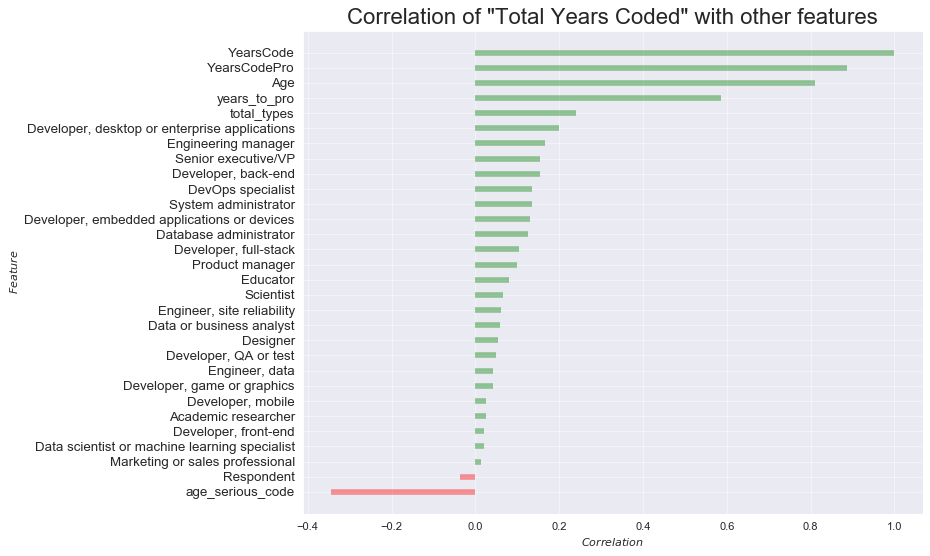

In [74]:
# Prepare Data
x = corrs1.loc[:, ['Feature']]
corrs1['colors'] = ['red' if x < 0 else 'green' for x in corrs1['Corr_YearsCode']]

# Draw plot
plt.figure(figsize=(10,8), dpi= 80)
plt.hlines(y=corrs1['Feature'], xmin=0, xmax=corrs1['Corr_YearsCode'], color=corrs1.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Feature$', xlabel='$Correlation$')
plt.yticks(corrs1.index, corrs1['Feature'], fontsize=12)
plt.title('Correlation of "Total Years Coded" with other features', fontdict={'size':20})
plt.grid(linestyle='-', alpha=0.5)
plt.show()

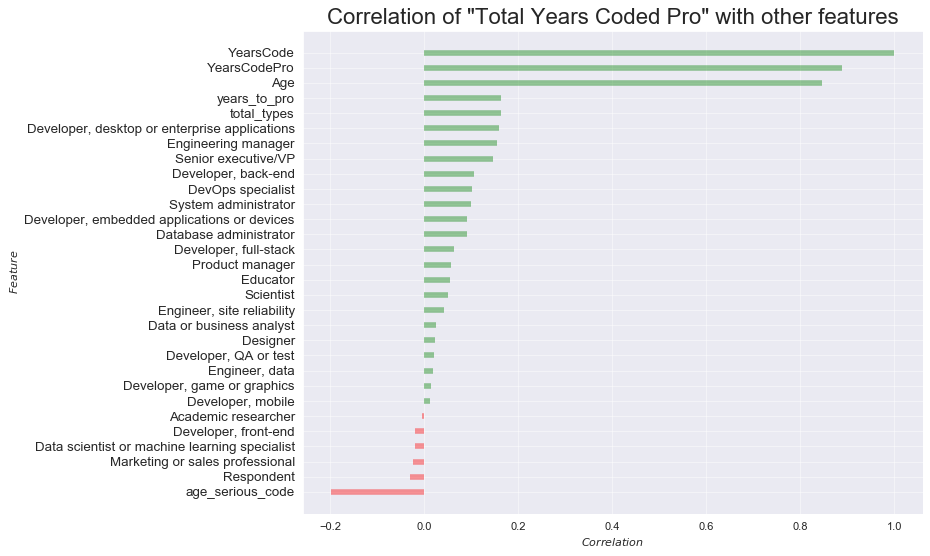

In [75]:
# Prepare Data
x = corrs1.loc[:, ['Feature']]
corrs1['colors'] = ['red' if x < 0 else 'green' for x in corrs1['Corr_YearsCodePro']]
corrs1.sort_values('Corr_YearsCodePro', inplace=True)

# Draw plot
plt.figure(figsize=(10,8), dpi= 80)
plt.hlines(y=corrs1['Feature'], xmin=0, xmax=corrs1['Corr_YearsCodePro'], color=corrs1.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Feature$', xlabel='$Correlation$')
plt.yticks(corrs1.index, corrs1['Feature'], fontsize=12)
plt.title('Correlation of "Total Years Coded Pro" with other features', fontdict={'size':20})
plt.grid(linestyle='-', alpha=0.5)
plt.show()

It is clear that Data specialists, marketing professionals and academic researcher do not require a lot of years to gain their skills.

### Merge dataframe with other columns of interest from the original data

In [76]:
df_to_combine = data[['Respondent','ConvertedComp', 'JobSat', 'NEWLearn']]

In [77]:
df_to_combine

,Respondent,ConvertedComp,JobSat,NEWLearn
3,4,NaN,Slightly dissatisfied,Once a year
4,5,NaN,NaN,Once a year
7,8,116000.0,Slightly dissatisfied,Once a year
8,9,NaN,Very dissatisfied,Once a year
9,10,32315.0,Very satisfied,Every few months
...,...,...,...,...
64426,60134,NaN,NaN,Once a year
64427,60149,NaN,NaN,Once a year
64430,61111,NaN,NaN,Every few months
64433,61561,NaN,NaN,Once a year


In [78]:
data6 = pd.merge(left = data5, right = df_to_combine, how='left', left_on = 'Respondent', right_on = 'Respondent')

In [79]:
data6.to_csv('SO_age_part2.csv', index=False)